In [38]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix

In [2]:
import os
os.getcwd()
os.chdir(r'/home/g28594ashish/13_AmazonFoodReview/Pre-Processing Data')

In [3]:
os.getcwd()

'/home/g28594ashish/13_AmazonFoodReview/Pre-Processing Data'

In [4]:
import pickle

filename='X_train'
infile = open(filename,'rb')
X_train=pickle.load(infile)
infile.close()

filename='y_train'
infile = open(filename,'rb')
y_train=pickle.load(infile)
infile.close()

filename='X_test'
infile = open(filename,'rb')
X_test=pickle.load(infile)
infile.close()

filename='y_test'
infile = open(filename,'rb')
y_test=pickle.load(infile)
infile.close()

In [30]:
#BOW
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() #ngram_range=(1,2)
X_train_BOW = count_vect.fit_transform(X_train)
X_test_BOW = count_vect.transform(X_test)

In [31]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer()
X_train_tf_idf = tf_idf_vect.fit_transform(X_train)
X_test_tf_idf = tf_idf_vect.transform(X_test)

In [ ]:
#Unpickling
import pickle

infile = open('Train_BOW_Std','rb')
X_train_bow_standarized_data=pickle.load(infile)
infile.close()

infile = open('Train_TFIDF_Std','rb')
X_train_tfidf_standarized_data=pickle.load(infile)
infile.close()

infile = open('Test_BOW_Std','rb')
X_test_bow_standarized_data=pickle.load(infile)
infile.close()

infile = open('Test_TFIDF_Std','rb')
X_test_TFIDF_standarized_data=pickle.load(infile)
infile.close()

In [32]:
alpha_cv=0.00001
alpha_values =[]
while(alpha_cv <=0.001):
    alpha_values.append(round(alpha_cv,5))
    alpha_cv+=0.0001

In [40]:
print alpha_values

[1e-05, 0.00011, 0.00021, 0.00031, 0.00041, 0.00051, 0.00061, 0.00071, 0.00081, 0.00091]


In [33]:
## Optimal Alpha on BOW

from datetime import datetime

start = datetime.now()
cv_scores = []
alpha_cv=0.00001

# perform 5-fold cross validation
while(alpha_cv <=0.001):
    nb = MultinomialNB(alpha=alpha_cv)
    scores = cross_val_score(nb, X_train_BOW, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    alpha_cv+=0.0001

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
optimal_alpha = alpha_values[cv_scores.index(max(cv_scores))]
print('\nThe optimal alpha using BOW is ', optimal_alpha)
print("The misclassification error for each alpha (using BOW) value is : ",np.round(MSE,3))

print "\nTime taken to execute Optimal Alpha :: ",datetime.now()-start

('\nThe optimal alpha using BOW is ', 0.00091)
('The misclassification error for each alpha (using BOW) value is : ', array([0.108, 0.107, 0.107, 0.107, 0.106, 0.106, 0.106, 0.106, 0.106,
       0.106]))

Time taken to execute Optimal Alpha ::  0:00:34.066490


In [37]:
#Using Bow
nb_optimal = MultinomialNB(alpha=optimal_alpha)
nb_optimal.fit(X_train_BOW, y_train)

# predict the response
pred = nb_optimal.predict(X_test_BOW)

# Function To Plot CONFUSION MATRIX

In [35]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


The accuracy of the NaiveBayes classifier(using BOW vectorization) for alpha = 0.000910 is 89.753963%

  CLASSIFICATION REPORT
             precision    recall  f1-score   support

   negative       0.67      0.68      0.68     17075
   positive       0.94      0.94      0.94     92177

avg / total       0.90      0.90      0.90    109252


  CONFUSION MATRIX
[[11661  5414]
 [ 5780 86397]]

  Plot of CONFUSION MATRIX


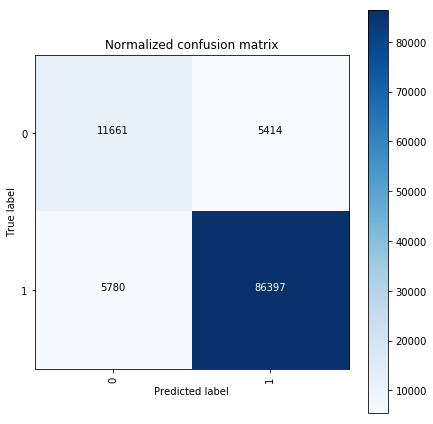

In [39]:
from sklearn.metrics import classification_report
# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the NaiveBayes classifier(using BOW vectorization) for alpha = %f is %f%%' % (optimal_alpha, acc))

#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, pred)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, pred)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

USING TF-IDF

In [40]:
## Optimal Alpha on TF-IDF

from datetime import datetime

start = datetime.now()
cv_scores = []
alpha_cv=0.00001

# perform 5-fold cross validation
while(alpha_cv <=0.001):
    nb = MultinomialNB(alpha=alpha_cv)
    scores = cross_val_score(nb, X_train_tf_idf, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    alpha_cv+=0.0001

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
optimal_alpha = alpha_values[cv_scores.index(max(cv_scores))]
print('\nThe optimal alpha using TF-IDF is ', optimal_alpha)
print("The misclassification error for each alpha (using TF-IDF) value is : ",np.round(MSE,3))

print "\nTime taken to execute Optimal Alpha :: ",datetime.now()-start

('\nThe optimal alpha using TF-IDF is ', 0.00091)
('The misclassification error for each alpha (using TF-IDF) value is : ', array([0.124, 0.124, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123, 0.123,
       0.123]))

Time taken to execute Optimal Alpha ::  0:00:32.917904


In [49]:
#Using TF-IDF
nb_optimal = MultinomialNB(alpha=optimal_alpha)
nb_optimal.fit(X_train_tf_idf, y_train)

# predict the response
pred = nb_optimal.predict(X_test_tf_idf)


The accuracy of the NaiveBayes classifier(using TF-iDF vectorization) for alpha = 0.000910 is 87.721964%

  CLASSIFICATION REPORT
             precision    recall  f1-score   support

   negative       0.84      0.26      0.40     17075
   positive       0.88      0.99      0.93     92177

avg / total       0.87      0.88      0.85    109252


  CONFUSION MATRIX
[[ 4512 12563]
 [  851 91326]]

  Plot of CONFUSION MATRIX


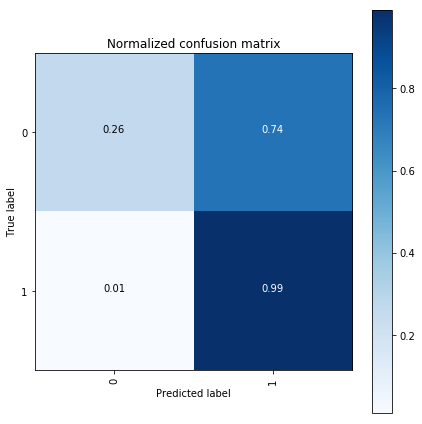

In [50]:
from sklearn.metrics import classification_report
# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the NaiveBayes classifier(using TF-iDF vectorization) for alpha = %f is %f%%' % (optimal_alpha, acc))

#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, pred)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, pred)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

# Function to Get Important Features/Words

In [51]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

In [52]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

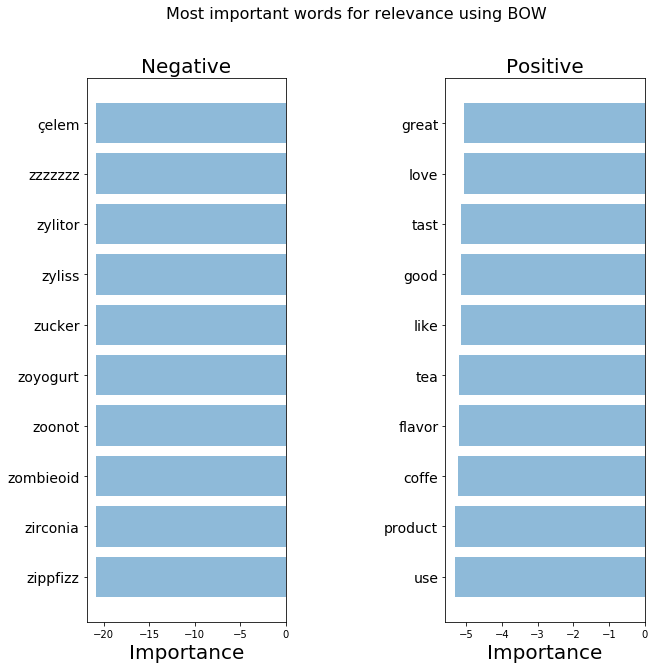

In [54]:
#Important Features in classifying the reviews using BOW
importance = get_most_important_features(count_vect, nb_optimal, 10)

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance using BOW")

In [55]:
importance #BOW

{0: {'bottom': [(-20.821168847861596, u'zippfizz'),
   (-20.821168847861596, u'zirconia'),
   (-20.821168847861596, u'zombieoid'),
   (-20.821168847861596, u'zoonot'),
   (-20.821168847861596, u'zoyogurt'),
   (-20.821168847861596, u'zucker'),
   (-20.821168847861596, u'zyliss'),
   (-20.821168847861596, u'zylitor'),
   (-20.821168847861596, u'zzzzzzz'),
   (-20.821168847861596, u'\xe7elem')],
  'tops': [(-5.318411171523316, u'use'),
   (-5.304223480989249, u'product'),
   (-5.216011747318518, u'coffe'),
   (-5.213287543905436, u'flavor'),
   (-5.207416128380087, u'tea'),
   (-5.150613511898014, u'like'),
   (-5.134894003552036, u'good'),
   (-5.130269976942211, u'tast'),
   (-5.069963767939084, u'love'),
   (-5.062894372661251, u'great')]}}

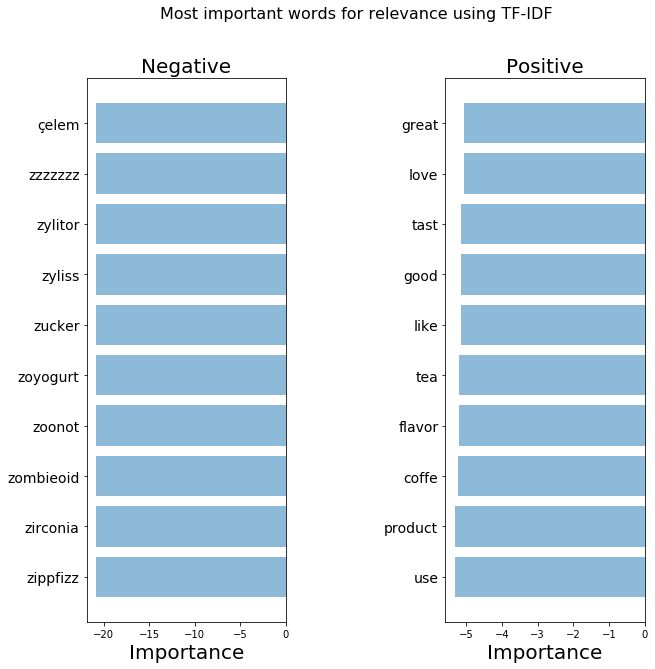

In [56]:
#Important Features in classifying the reviews using TF-IDF
importance = get_most_important_features(tf_idf_vect, nb_optimal, 10)

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance using TF-IDF")

In [57]:
importance

{0: {'bottom': [(-20.821168847861596, u'zippfizz'),
   (-20.821168847861596, u'zirconia'),
   (-20.821168847861596, u'zombieoid'),
   (-20.821168847861596, u'zoonot'),
   (-20.821168847861596, u'zoyogurt'),
   (-20.821168847861596, u'zucker'),
   (-20.821168847861596, u'zyliss'),
   (-20.821168847861596, u'zylitor'),
   (-20.821168847861596, u'zzzzzzz'),
   (-20.821168847861596, u'\xe7elem')],
  'tops': [(-5.318411171523316, u'use'),
   (-5.304223480989249, u'product'),
   (-5.216011747318518, u'coffe'),
   (-5.213287543905436, u'flavor'),
   (-5.207416128380087, u'tea'),
   (-5.150613511898014, u'like'),
   (-5.134894003552036, u'good'),
   (-5.130269976942211, u'tast'),
   (-5.069963767939084, u'love'),
   (-5.062894372661251, u'great')]}}

It is observed that our dataset has a better accuracy on using the BOW rather than TF_IDF using Naive Bayes Classifier.

Our classifier correctly picks up on some positive words (great,love, taste,good), but clearly seems to be overfitting on some Negative terms 